# Adding fields

When we have to fields $u_1$ and $u_2$, we can define a new field $u_3 = u_1 + u_2$. This produces interferences between the fields, as the obervable is the intensity distribution $I = |u|^2$.

Programmatically this is performed with the special method __add__ . However, we can also use the __add__ method to add to masks. In this case, the method is more complex. For example, if the two mask overlaps, we can obtain a transmittance > 1, which is not physical. In this case, we have to normalize the mask.

Therefore, we have developed a more complex __add method__ that can add fields and masks. All the programation included in the utils_common.py file, in the add(self,other,kind) function.

The kind parameter provides instruction how to add the fields. The possible values are: ['source', 'mask', 'phases', 'no_overlap', 'distances']:

- 'source': adds the fields as they are: $u_3 = u_1 + u_2$

- 'mask': adds the fields as complex numbers and then normalizes so that the maximum amplitude is 1.

- 'phases': adds the phases and then normalizes so that the maximum amplitude is 1.

- 'np_overlap': adds the fields as they are. Jowever, the sum of the amplitudes is greater than 1, an error is produced
- 'distances': adds the fields as they are. If the fields overlap, the field is from the field with the smallest distance to the center of mass of indivual mask. This is only developed (up to now) for the case of X fields.


In this notebook, we will show how to add fields and masks.


In [1]:

from diffractio import np
from diffractio import mm, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY


from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.utils_common import add


# Scalar X

In [2]:
x = np.linspace(-500,500,256)
wavelength = 0.6329*um

u1 = Scalar_source_X(x, wavelength)
u1.spherical_wave(x0=-200, A=1, z0=75*mm)
u1.normalize()

u2 = Scalar_source_X(x, wavelength)
u2.spherical_wave(x0=200, A=1, z0=75*mm)
u2.normalize()

t1 = Scalar_mask_X(x, wavelength)
t1.slit(x0=-100, size = 400*um)

t2 = Scalar_mask_X(x, wavelength)
t2.slit(x0=100, size = 400*um)

t3 = Scalar_mask_X(x, wavelength)
t3.lens(x0=200, focal=30*mm, radius = 400*um)

t4 = Scalar_mask_X(x, wavelength)
t4.lens(x0=-200, focal=30*mm, radius = 400*um)


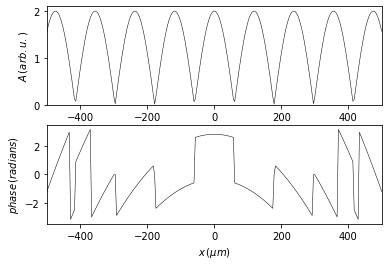

In [3]:
# Two sphercial waves: interference is produced
t=u1+u2
t.draw('field')

/home/luismiguel/bitbucket/diffractio/diffractio/utils_common.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  t.u[i_change]=(np.exp(1j*f1[i_change])+np.exp(1j*f2[i_change])).astype(np.complex128)


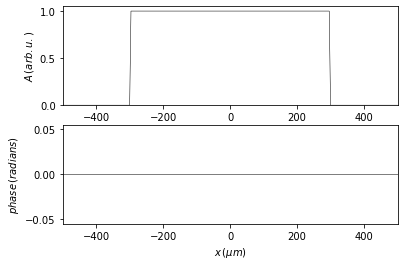

In [4]:
# Two slits: mask is normalized
t=t1+t2
t.draw('field')

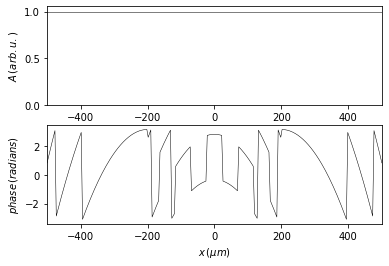

In [5]:
# Two lenses:
t=t3+t4
t.draw('field')

In [6]:
# An error is produced, as the two slits overlap
t=add(t1,t2, kind='no_overlap')

ValueError: The two fields overlap

not valid for 2D


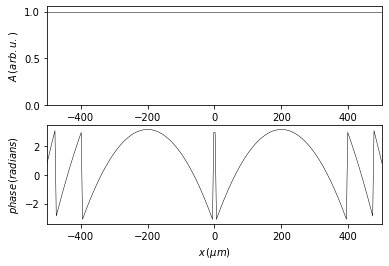

In [7]:
t=add(t3,t4, kind='distances')
t.draw('field')

# Scalar XY

In [8]:
x = np.linspace(-500,500,256)
y = np.linspace(-500,500,256)
wavelength = 0.6329*um

u1 = Scalar_source_XY(x, y, wavelength)
u1.spherical_wave(r0=(-200,0), A=1, z0=75*mm)
u1.normalize()

u2 = Scalar_source_XY(x, y, wavelength)
u2.spherical_wave(r0=(200,0), A=1, z0=75*mm)
u2.normalize()

t1 = Scalar_mask_XY(x,y,wavelength)
t1.circle(r0=(-200,0), radius = 400*um)

t2 = Scalar_mask_XY(x,y,wavelength)
t2.circle(r0=(200,0), radius = 400*um)

t3 = Scalar_mask_XY(x,y,wavelength)
t3.lens(r0=(200,0), focal=30*mm, radius = 400*um)

t4 = Scalar_mask_XY(x,y,wavelength)
t4.lens(r0=(-200,0), focal=30*mm, radius = 400*um)


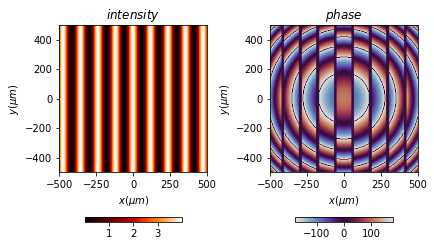

In [9]:
# Two fields are added: Interferences are produced
t=u1+u2
t.draw(kind ='field')

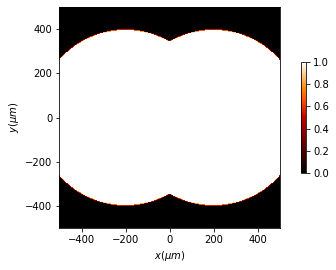

In [10]:
# Adding two circles: mask is normalized
t=t1+t2
t.draw(has_colorbar='vertical')

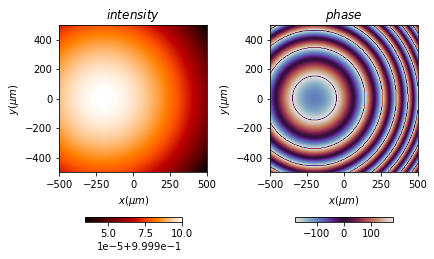

In [11]:
u1.draw('field')

### With add function

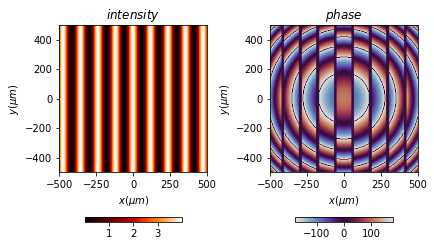

In [12]:
u=add(u1,u2,'source')
u.draw('field')

In [13]:
u=add(u1,u2,'no_overlap')
u.draw('field')

ValueError: The two fields overlap

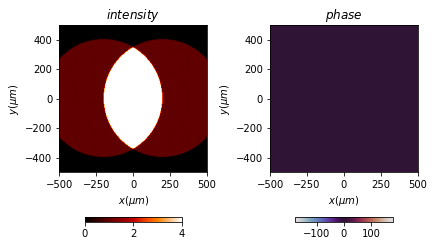

In [23]:
# overlapping is produced and is not corrected as we are in 'source' mode
t=add(t2,t1,'source')
t.draw('field')

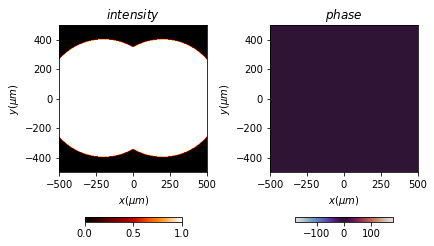

In [24]:
t=add(t2,t1,'mask')
t.draw('field')

In [14]:
t=add(t3,t4, 'no_overlap')
t.draw('field')

ValueError: The two fields overlap

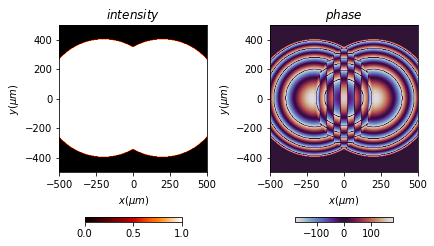

In [15]:
t=add(t3,t4, 'mask')
t.draw('field')

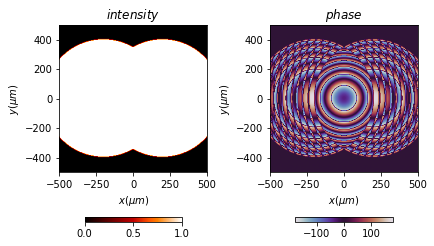

In [16]:
# The phase method can be useful in some circumstance, but be careful with the results
t=add(t3,t4, 'phases')
t.draw('field')

not valid for 2D


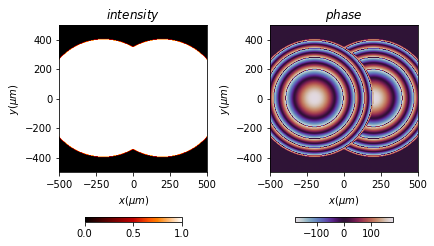

In [17]:
# TODO: not implemented yet
t=add(t3,t4, 'distances')
t.draw('field')

With the add method we can also add several fields at the same time:

In [18]:
c1 = Scalar_mask_XY(x,y,wavelength)
c1.circle(r0=(-200,0), radius = 100*um)

c2 = Scalar_mask_XY(x,y,wavelength)
c2.circle(r0=(200,0), radius = 100*um)

c3 = Scalar_mask_XY(x,y,wavelength)
c3.circle(r0=(0,200), radius = 100*um)

c4 = Scalar_mask_XY(x,y,wavelength)
c4.circle(r0=(0,-200), radius = 100*um)

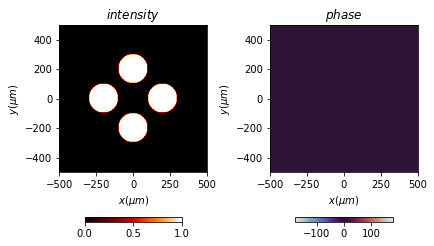

In [19]:
c_total = c1+c2+c3+c4
c_total.draw('field')

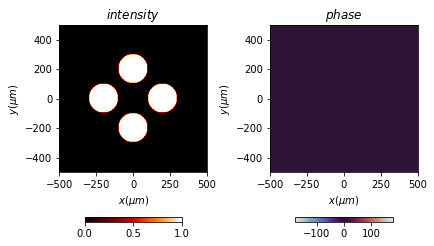

In [20]:
# It can also be performed with the add method.

c_total = add(c1,(c2,c3,c4), kind='mask')
c_total.draw('field')